Urban Data Science & Smart Cities <br>
URSP688Y Spring 2025<br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

# Exercise04

This last exercise is an opportunity for you to get started on your final project. Please identify a portion of your project to get started on and submit a notebook (and any other related files) where you:

1. State the question you are aiming to address with this portion of your analysis
2. Outline the approach you will use to answer that question (pseudocode or you can start to more formally outline the approach section for your final narrative)
3. Operationalize your approach with data and code that you can later slot into your final analysis

## Submitting

Please make a pull request with all of your code and reasonably-sized data in a folder with your first name. See the example with my name in the `exercise04` directory.

If you have datasets that are too large for GitHub or should not be made public, please upload them to a cloud location (e.g., Google Drive) to which I (and ideally your classmates) have access. Please also provide instructions for how someone running your code should properly locate or connect to these files so the analysis will run properly. For example, should they copy and paste the files into the same directory as your notebook, or a provided `data` directory? Best practice is to include these instructions in a separate ReadMe.md or ReadMe.txt file, or at the top of your notebook.

#### ~ Sam's Exercise 04 Begins Here ~

# The Red Line Divide: Examining Housing Affordability Changes Near Montgomery County Metro Stations



Core Question:
How has housing affordability changed near west vs east Red Line Metorrail stations in Montgomery County over the past decade? 


In Montgomery County, the west side of the Red Line is generally wealthier and more expensive to live in than the east side. This analysis will use Python to spatially and statistically measure housing change patterns on each side of the Red Line metrorail corridor. 

In [1]:
# Pseudocode for Data Collection

# Collect spatial data for Montgomery County Metrorail stations from Montgomery County Planning Department
# Collect census tract data for housing affordability metrics for both 2023 and 2013 (5-Year ACS)
    # Median Hosuehold Income
    # Median Gross Rent
    # Median Home Value
    # % Renters vs Owners

## Time to import and clean some data!

In [2]:
import pandas as pd
import os

# Create directories for raw and cleaned data
raw_dir = 'Census_Data/'
cleaned_dir = 'Census_Data/cleaned/'

os.makedirs(cleaned_dir, exist_ok=True)

# List of files to clean
files = [
    '2023 5-year MHI.csv',
    '2013 5-year MHI.csv',
    '2023 5-year Median Gross Rent.csv',
    '2013 5-year Median Gross Rent.csv',
    '2023 5-year Median Value.csv',
    '2013 5-year Median Value.csv',
    '2023 5-year Renter v Owner.csv',
    '2013 5-year Renter v Owner.csv'
]

# Function to clean the census_data file
def clean_census_file(filename):
    df = pd.read_csv(os.path.join(raw_dir, filename))

    # Print the columns to check the format of the data
    print("Columns in the file:", df.columns)

    # Create dictionaries to store the new column names
    new_column_names = {}

    # Iterate over the columns to process Estimate and Margin of Error columns
    for col in df.columns:
        if '!!Estimate' in col:
            # Extract the tract number 
            tract_number = col.split('!!')[0].split('Census Tract ')[-1].split(',')[0].strip()
            geo_id = '24031' + tract_number.replace('.', '')  # FIPS code + tract number without extra zeroes
            new_column_names[col] = f'{geo_id} Estimate'  # Renaming Estimate columns
            
        elif '!!Margin of Error' in col:
            # Extract the tract number
            tract_number = col.split('!!')[0].split('Census Tract ')[-1].split(',')[0].strip()
            geo_id = '24031' + tract_number.replace('.', '')  # FIPS code + tract number without extra zeroes
            new_column_names[col] = f'{geo_id} Margin of Error'  # Renaming Margin of Error columns

    # Rename the columns in the dataframe
    df.rename(columns=new_column_names, inplace=True)

    # Save the cleaned data
    cleaned_filename = filename.replace('.csv', '_cleaned.csv')
    df.to_csv(os.path.join(cleaned_dir, cleaned_filename), index=False)
    print(f'Cleaned {filename} → {cleaned_filename}')

# Clean all files
for f in files:
    clean_census_file(f)

print("Done cleaning all files!")


Columns in the file: Index(['Label (Grouping)',
       'Census Tract 7001.01; Montgomery County; Maryland!!Estimate',
       'Census Tract 7001.01; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7001.03; Montgomery County; Maryland!!Estimate',
       'Census Tract 7001.03; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7001.04; Montgomery County; Maryland!!Estimate',
       'Census Tract 7001.04; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7001.05; Montgomery County; Maryland!!Estimate',
       'Census Tract 7001.05; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7002.04; Montgomery County; Maryland!!Estimate',
       ...
       'Census Tract 7060.09; Montgomery County; Maryland!!Estimate',
       'Census Tract 7060.09; Montgomery County; Maryland!!Margin of Error',
       'Census Tract 7060.10; Montgomery County; Maryland!!Estimate',
       'Census Tract 7060.10; Montgomery County; Maryland!!Margin 

In [3]:
import os
os.makedirs("output", exist_ok=True)

In [4]:
# Import Metrorail station and census tract data and confirm CRS match
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load the GeoJSON files
metro_stations = gpd.read_file('Metro Stations/Maryland_Transit_-_WMATA_Metro_Stops.geojson')
census_tracts = gpd.read_file('Census Tracts/Maryland_Census_Boundaries_-_Census_Tracts_2020.geojson')

# 2. Check the Coordinate Reference Systems (CRS)
print("Metro Stations CRS:", metro_stations.crs)
print("Census Tracts CRS:", census_tracts.crs)


Metro Stations CRS: EPSG:4326
Census Tracts CRS: EPSG:4326


In [5]:
print(metro_stations.columns)
print(metro_stations.head())

Index(['OBJECTID', 'GIS_ID', 'NAME', 'WEB_URL', 'ADDRESS', 'MetroLine',
       'geometry'],
      dtype='object')
   OBJECTID  GIS_ID                  NAME  \
0         1  mstn_1  College Park-U of Md   
1         2  mstn_2       Capitol Heights   
2         3  mstn_3      Morgan Boulevard   
3         4  mstn_4  Georgia Ave Petworth   
4         5  mstn_5                Takoma   

                                             WEB_URL  \
0  http://www.wmata.com/rail/station_detail.cfm?s...   
1  http://www.wmata.com/rail/station_detail.cfm?s...   
2  http://www.wmata.com/rail/station_detail.cfm?s...   
3  http://www.wmata.com/rail/station_detail.cfm?s...   
4  http://www.wmata.com/rail/station_detail.cfm?s...   

                                   ADDRESS             MetroLine  \
0      4931 CALVERT ROAD, COLLEGE PARK, MD         green, yellow   
1  133 CENTRAL AVENUE, CAPITOL HEIGHTS, MD  blue, orange, silver   
2   300 GARRETT MORGAN BLVD., LANDOVER, MD  blue, orange, silver   
3   37

In [6]:
# Filter to only Red Line stations
red_line_stations = metro_stations[metro_stations['MetroLine'] == 'red']

# Reproject both datasets to Maryland State Plane (meters)
red_line_stations = red_line_stations.to_crs(epsg=26985)
census_tracts = census_tracts.to_crs(epsg=26985)

# Buffer stations by half a mile (804.672 meters)
red_line_buffers = red_line_stations.copy()
red_line_buffers['geometry'] = red_line_buffers.buffer(804.672)

# Spatial join: find census tracts that intersect with any Red Line buffer
tracts_near_red_line = gpd.sjoin(census_tracts, red_line_buffers, how='inner', predicate='intersects')


In [7]:
# Save to GeoJSON
tracts_near_red_line.to_file('Metro Stations/Red_Line_Adjacent_Census_Tracts.geojson', driver='GeoJSON')

# Save to CSV (attribute data only, without geometry)
tracts_near_red_line.drop(columns='geometry').to_csv('Metro Stations/Red_Line_Adjacent_Census_Tracts.csv', index=False)


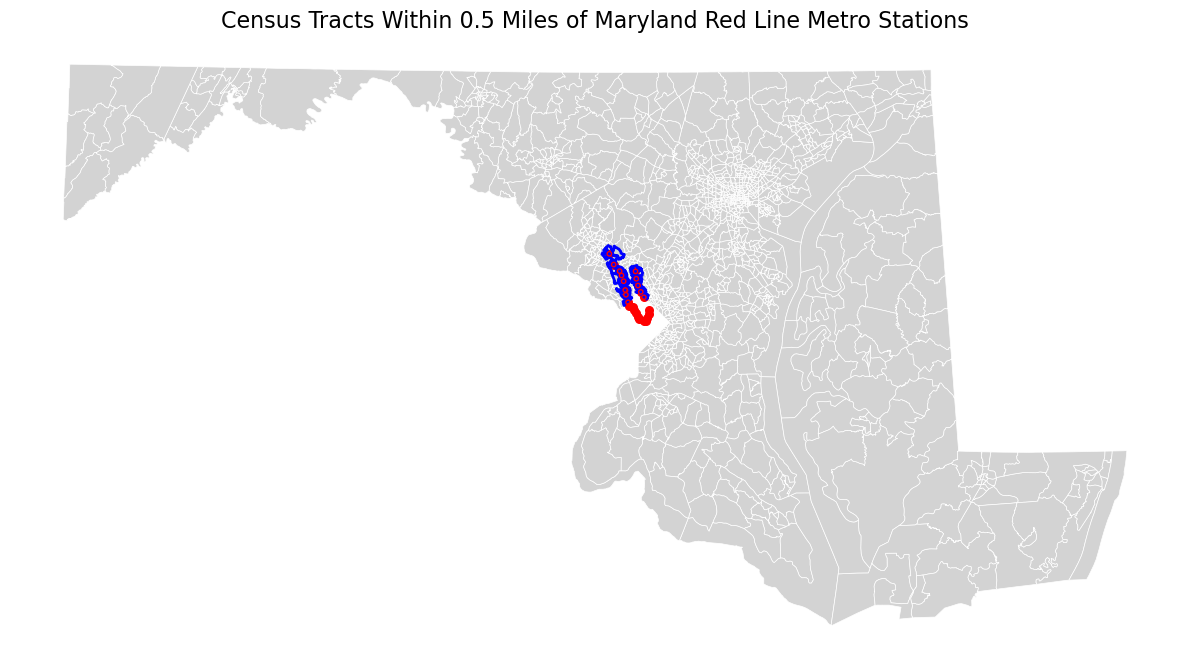

In [8]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot all census tracts in light gray
census_tracts.to_crs(epsg=26985).plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

# Plot only the Red Line half-mile buffers in transparent red
red_line_buffers.boundary.plot(ax=ax, color='red', linewidth=1)

# Plot Red Line stations as red points
red_line_stations.to_crs(epsg=26985).plot(ax=ax, color='red', markersize=30)

# Plot the selected census tracts in blue
tracts_near_red_line.to_crs(epsg=26985).plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2)

# Title and axes off
ax.set_title('Census Tracts Within 0.5 Miles of Maryland Red Line Metro Stations', fontsize=16)
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.savefig("output/Context_Map1.png", dpi=300, bbox_inches="tight")
plt.show()


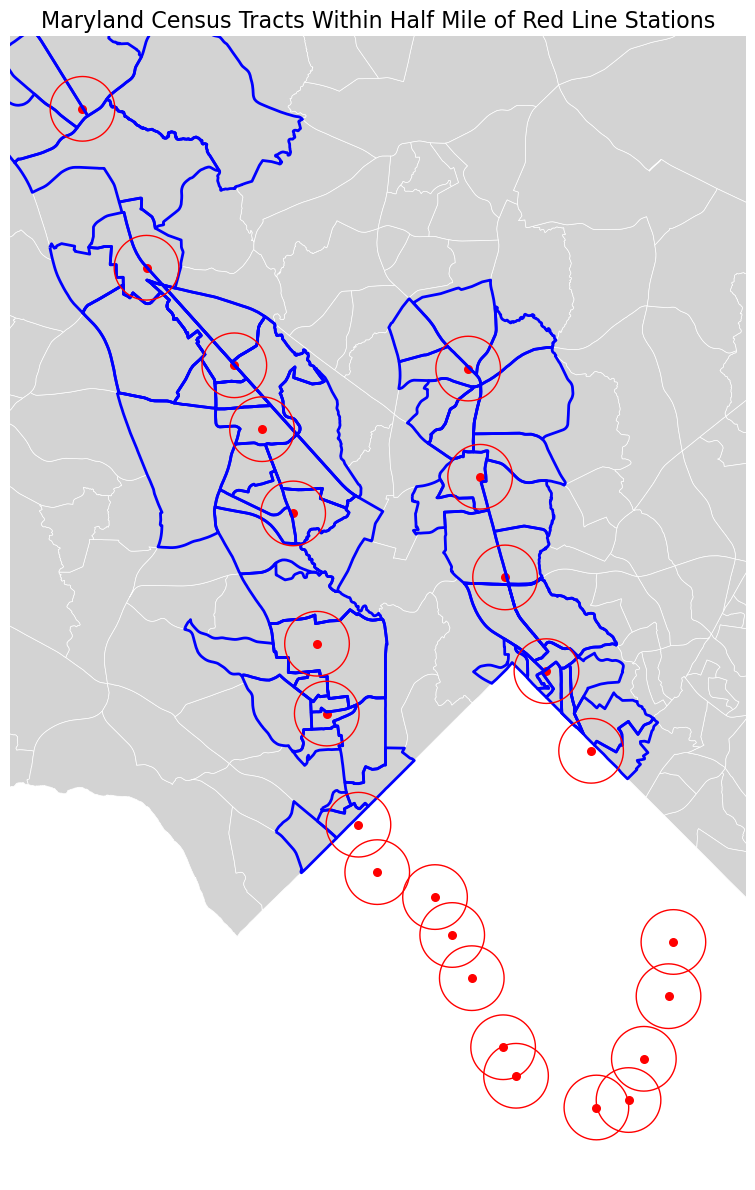

In [9]:
# Get the total bounds of the red_line_buffers 
bounds = red_line_buffers.total_bounds
buffer = 1000  # Optional: add padding (in meters) around the bounds

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot everything same as before
census_tracts.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)
red_line_buffers.boundary.plot(ax=ax, color='red', linewidth=1)
red_line_stations.plot(ax=ax, color='red', markersize=30)
tracts_near_red_line.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2)

# Set the plot limits to zoom in
ax.set_xlim(bounds[0] - buffer, bounds[2] + buffer)
ax.set_ylim(bounds[1] - buffer, bounds[3] + buffer)

ax.set_title('Maryland Census Tracts Within Half Mile of Red Line Stations', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.savefig("output/Context_Map2.png", dpi=300, bbox_inches="tight")
plt.show()


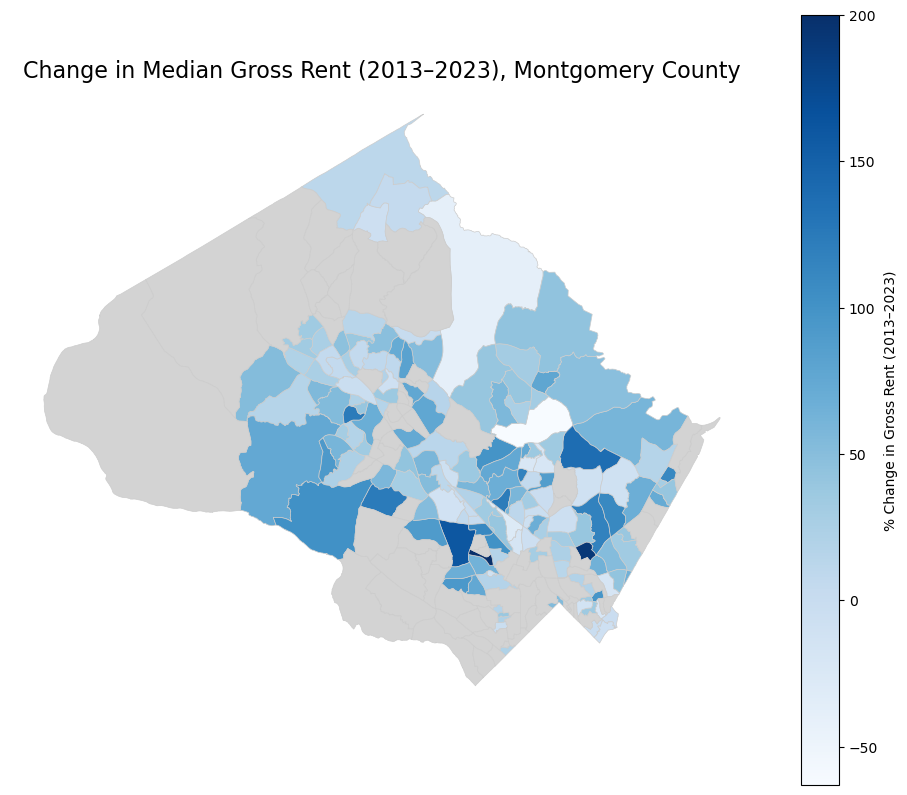

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Reload CSV
changes_df = pd.read_csv("Census_Data/Final_Tract-Level_Percent_Changes.csv")

# Drop rows where GEOID is not numeric
changes_df = changes_df[pd.to_numeric(changes_df["GEOID"], errors="coerce").notna()].copy()

# Extract last 6 digits (the true tract code), then rebuild correct FIPS
changes_df["GEOID"] = changes_df["GEOID"].astype(str).str.extract(r"(\d{6})$")[0]  # get last 6 digits
changes_df["GEOID"] = "24031" + changes_df["GEOID"]  # prepend county FIPS to make 11-digit GEOID

# Load Montgomery County census tracts
census_tracts = gpd.read_file("Census Tracts/Maryland_Census_Boundaries_-_Census_Tracts_2020.geojson")
census_tracts = census_tracts[census_tracts["COUNTYFP20"] == "031"]

# Make sure both datasets use 11-digit GEOIDs
census_tracts["GEOID"] = census_tracts["GEOID20"].astype(str).str.zfill(11)
changes_df["GEOID"] = changes_df["GEOID"].astype(str).str.zfill(11)

# Merge and map
map_df = census_tracts.merge(changes_df, on="GEOID", how="left")

# Plot Rent Change
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
map_df.plot(
    column="Rent_Change_%",
    cmap="Blues",
    linewidth=0.5,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    vmax=200,
    legend_kwds={"label": "% Change in Gross Rent (2013–2023)"},
    missing_kwds={"color": "lightgrey", "label": "No data"},
)

ax.set_title("Change in Median Gross Rent (2013–2023), Montgomery County", fontsize=16)
ax.axis("off")
plt.show()


In [11]:
import pandas as pd
import geopandas as gpd

# Reload data
changes_df = pd.read_csv("Census_Data/Final_Tract-Level_Percent_Changes.csv")
changes_df = changes_df[pd.to_numeric(changes_df["GEOID"], errors="coerce").notna()].copy()
changes_df["GEOID"] = changes_df["GEOID"].astype(str).str.extract(r"(\d{6})$")[0]  # last 6 digits only
changes_df["GEOID"] = "24031" + changes_df["GEOID"]  # reconstruct 11-digit FIPS code

# Load and format census tracts
census_tracts = gpd.read_file("Census Tracts/Maryland_Census_Boundaries_-_Census_Tracts_2020.geojson")
census_tracts = census_tracts[census_tracts["COUNTYFP20"] == "031"]
census_tracts["GEOID"] = census_tracts["GEOID20"].astype(str).str.zfill(11)

# Merge
map_df = census_tracts.merge(changes_df, on="GEOID", how="left")

# Extract top and bottom values
top_mhi = map_df.nlargest(5, "MHI_Change_%")[["GEOID", "MHI_Change_%"]]
bottom_mhi = map_df.nsmallest(5, "MHI_Change_%")[["GEOID", "MHI_Change_%"]]
top_value = map_df.nlargest(5, "Value_Change_%")[["GEOID", "Value_Change_%"]]
bottom_value = map_df.nsmallest(5, "Value_Change_%")[["GEOID", "Value_Change_%"]]

# Display tables
print("\nTop 5 Tracts by MHI Change:\n", top_mhi)
print("\nBottom 5 Tracts by MHI Change:\n", bottom_mhi)
print("\nTop 5 Tracts by Home Value Change:\n", top_value)
print("\nBottom 5 Tracts by Home Value Change:\n", bottom_value)

print(map_df[["GEOID", "MHI_Change_%", "Value_Change_%"]].dropna().head())




Top 5 Tracts by MHI Change:
            GEOID  MHI_Change_%
158  24031700713    328.740848
17   24031701422    321.089389
4    24031701219    309.473684
7    24031706012    285.154601
10   24031701423    253.056848

Bottom 5 Tracts by MHI Change:
            GEOID  MHI_Change_%
99   24031704502    -54.784174
208  24031700718    -53.084563
141  24031706007    -50.328149
1    24031700828    -48.566780
121  24031704503    -44.496760

Top 5 Tracts by Home Value Change:
            GEOID  Value_Change_%
7    24031706012      441.166989
215  24031703216      358.908507
211  24031700724      263.898421
158  24031700713      260.970280
8    24031703218      252.165256

Bottom 5 Tracts by Home Value Change:
            GEOID  Value_Change_%
21   24031705502      -74.860000
68   24031701308      -61.923567
141  24031706007      -54.604355
188  24031701001      -41.682637
112  24031700824      -40.479275
         GEOID  MHI_Change_%  Value_Change_%
0  24031701221     98.119359      -18.480000
1 

In [12]:
def label_tracts(ax, gdf, value_col, fontsize=9):
    for _, row in gdf.iterrows():
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        label = f"{row['GEOID'][-6:]}\n{row[value_col]:.2f}%"
        ax.annotate(
            label,
            xy=(x, y),
            xytext=(0, 0),
            textcoords="offset points",
            ha="center",
            fontsize=fontsize,
            color="black",
            backgroundcolor="white",
        )

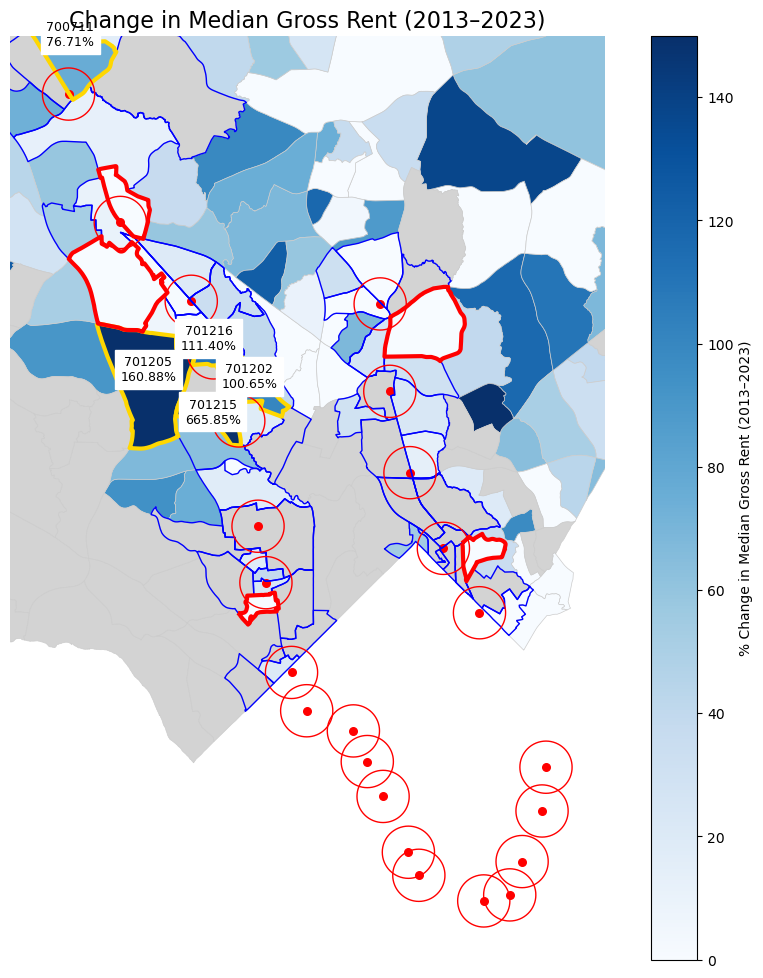

In [19]:
tracts_near_red_line["GEOID"] = tracts_near_red_line["GEOID20"].astype(str).str.zfill(11)

# Top/bottom 5 for Rent Change (within Red Line buffer)
buffer_tracts = map_df[map_df["GEOID"].isin(tracts_near_red_line["GEOID"])]
top_rent = buffer_tracts.nlargest(5, "Rent_Change_%")
bottom_rent = buffer_tracts.nsmallest(5, "Rent_Change_%")

top_tracts = map_df[map_df["GEOID"].isin(top_rent["GEOID"])]
bottom_tracts = map_df[map_df["GEOID"].isin(bottom_rent["GEOID"])]

# Plot Gross Rent Change
fig, ax = plt.subplots(figsize=(12, 12))
map_df.plot(
    column="Rent_Change_%",
    cmap="Blues",
    linewidth=0.5,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    vmax=150,
    vmin=0,
    legend_kwds={"label": "% Change in Median Gross Rent (2013–2023)"},
    missing_kwds={"color": "lightgrey", "label": "No data"},
)

# Red Line overlays
map_df = map_df.to_crs(red_line_stations.crs)
if 'red_line_buffers' in locals():
    red_line_buffers.boundary.plot(ax=ax, color='red', linewidth=1)
if 'red_line_stations' in locals():
    red_line_stations.plot(ax=ax, color='red', markersize=30)
if 'tracts_near_red_line' in locals():
    tracts_near_red_line.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=1)

# Callouts
top_tracts.plot(ax=ax, facecolor='none', edgecolor='gold', linewidth=3)
bottom_tracts.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3)

label_tracts(ax, top_tracts, value_col="Rent_Change_%")

# Zoom
bounds = red_line_buffers.total_bounds
buffer = 1000
ax.set_xlim(bounds[0] - buffer, bounds[2] + buffer)
ax.set_ylim(bounds[1] - buffer, bounds[3] + buffer)

ax.set_title("Change in Median Gross Rent (2013–2023)", fontsize=16)
ax.axis("off")
plt.show()


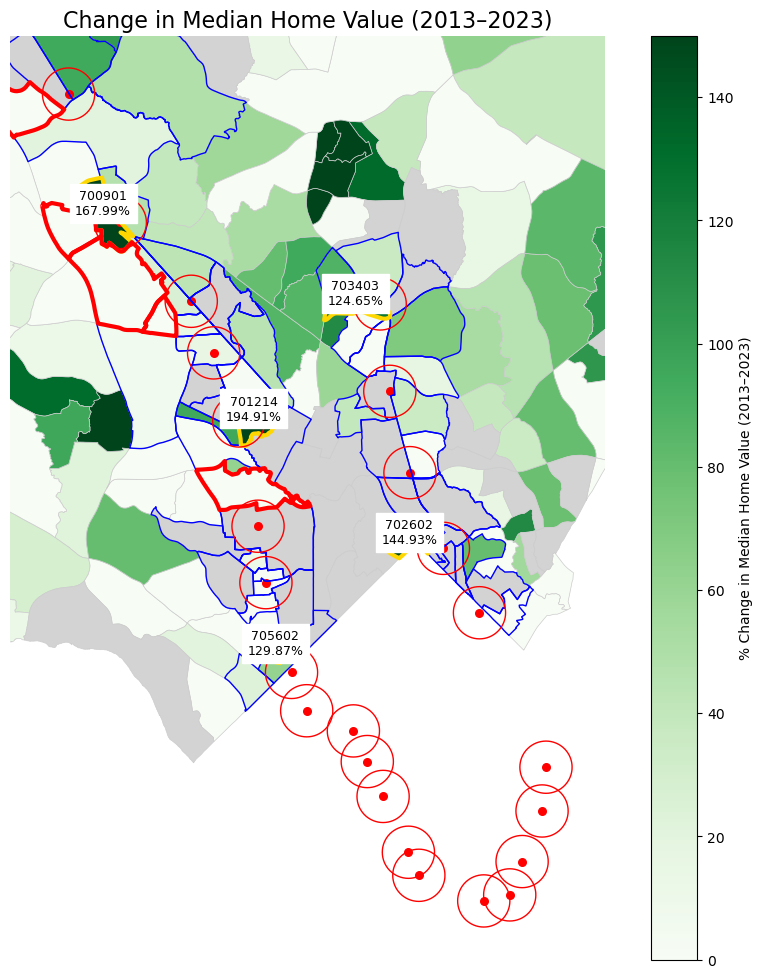

In [21]:
# Step 1: Get tracts near Red Line with standardized GEOID
tracts_near_red_line["GEOID"] = tracts_near_red_line["GEOID20"].astype(str).str.zfill(11)

# Step 2: Filter tracts in buffer zone
buffer_tracts = map_df[map_df["GEOID"].isin(tracts_near_red_line["GEOID"])]

# Step 3: Get top and bottom 5 tracts for Home Value Change
top_value = buffer_tracts.nlargest(5, "Value_Change_%")
bottom_value = buffer_tracts.nsmallest(5, "Value_Change_%")

# Step 4: Extract those from full dataset for highlighting
top_tracts = map_df[map_df["GEOID"].isin(top_value["GEOID"])]
bottom_tracts = map_df[map_df["GEOID"].isin(bottom_value["GEOID"])]

# Step 5: Plot
fig, ax = plt.subplots(figsize=(12, 12))
map_df.plot(
    column="Value_Change_%",
    cmap="Greens",
    linewidth=0.5,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    vmax=150,
    vmin=0,
    legend_kwds={"label": "% Change in Median Home Value (2013–2023)"},
    missing_kwds={"color": "lightgrey", "label": "No data"},
)

# Step 6: Red Line overlays
map_df = map_df.to_crs(red_line_stations.crs)
if 'red_line_buffers' in locals():
    red_line_buffers.boundary.plot(ax=ax, color='red', linewidth=1)
if 'red_line_stations' in locals():
    red_line_stations.plot(ax=ax, color='red', markersize=30)
if 'tracts_near_red_line' in locals():
    tracts_near_red_line.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=1)

# Step 7: Callouts and labels
top_tracts.plot(ax=ax, facecolor='none', edgecolor='gold', linewidth=3)
bottom_tracts.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3)
label_tracts(ax, top_tracts, value_col="Value_Change_%")

# Step 8: Zoom
bounds = red_line_buffers.total_bounds
buffer = 1000
ax.set_xlim(bounds[0] - buffer, bounds[2] + buffer)
ax.set_ylim(bounds[1] - buffer, bounds[3] + buffer)

ax.set_title("Change in Median Home Value (2013–2023)", fontsize=16)
ax.axis("off")
plt.show()


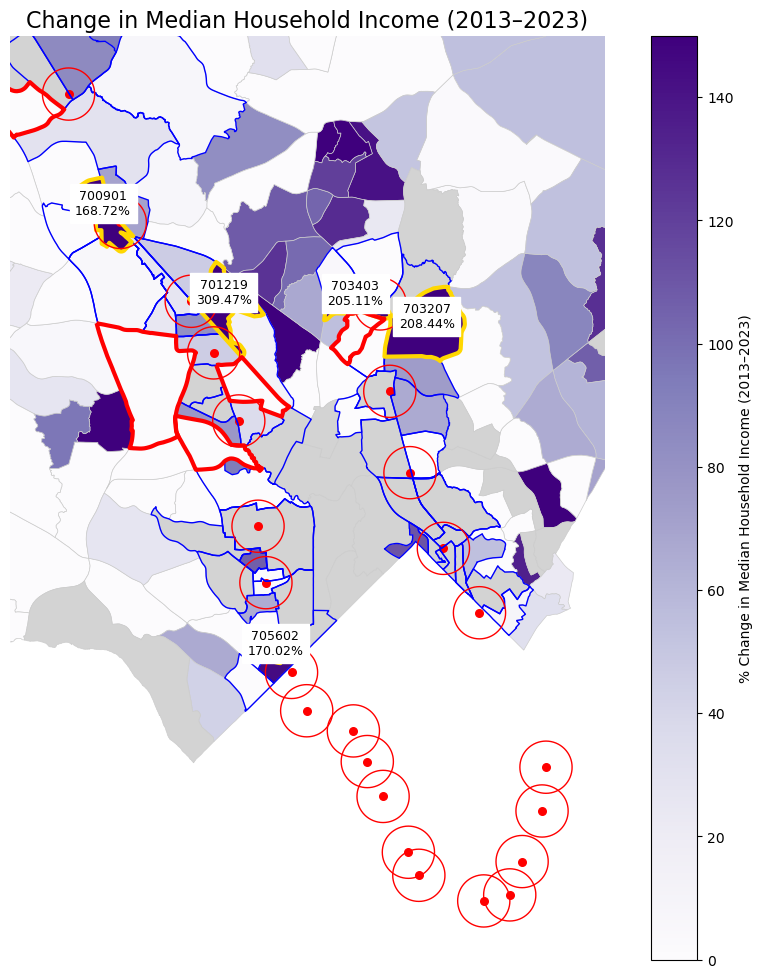

In [22]:
# Step 1: Ensure tracts_near_red_line has a proper GEOID column
tracts_near_red_line["GEOID"] = tracts_near_red_line["GEOID20"].astype(str).str.zfill(11)

# Step 2: Filter to buffer-zone tracts
buffer_tracts = map_df[map_df["GEOID"].isin(tracts_near_red_line["GEOID"])]

# Step 3: Get top and bottom 5 tracts for MHI Change
top_mhi = buffer_tracts.nlargest(5, "MHI_Change_%")
bottom_mhi = buffer_tracts.nsmallest(5, "MHI_Change_%")

# Step 4: Extract those tracts from full map_df for plotting
top_tracts = map_df[map_df["GEOID"].isin(top_mhi["GEOID"])]
bottom_tracts = map_df[map_df["GEOID"].isin(bottom_mhi["GEOID"])]

# Step 5: Plot
fig, ax = plt.subplots(figsize=(12, 12))
map_df.plot(
    column="MHI_Change_%",
    cmap="Purples",
    linewidth=0.5,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    vmax=150,
    vmin=0,
    legend_kwds={"label": "% Change in Median Household Income (2013–2023)"},
    missing_kwds={"color": "lightgrey", "label": "No data"},
)

# Step 7: Red Line overlays
map_df = map_df.to_crs(red_line_stations.crs)
if 'red_line_buffers' in locals():
    red_line_buffers.boundary.plot(ax=ax, color='red', linewidth=1)
if 'red_line_stations' in locals():
    red_line_stations.plot(ax=ax, color='red', markersize=30)
if 'tracts_near_red_line' in locals():
    tracts_near_red_line.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=1)

# Step 6: Callouts and labels
top_tracts.plot(ax=ax, facecolor='none', edgecolor='gold', linewidth=3)
bottom_tracts.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3)
label_tracts(ax, top_tracts, value_col="MHI_Change_%")

# Step 8: Zoom to corridor
bounds = red_line_buffers.total_bounds
buffer = 1000
ax.set_xlim(bounds[0] - buffer, bounds[2] + buffer)
ax.set_ylim(bounds[1] - buffer, bounds[3] + buffer)

ax.set_title("Change in Median Household Income (2013–2023)", fontsize=16)
ax.axis("off")
plt.show()


In [16]:
# First, ensure buffer_tracts is filtered to tracts near Red Line
buffer_tracts = map_df[map_df["GEOID"].isin(tracts_near_red_line["GEOID"])]

# Create summary tables
top_mhi = buffer_tracts.nlargest(5, "MHI_Change_%")[["GEOID", "MHI_Change_%"]].copy()
bottom_mhi = buffer_tracts.nsmallest(5, "MHI_Change_%")[["GEOID", "MHI_Change_%"]].copy()

top_value = buffer_tracts.nlargest(5, "Value_Change_%")[["GEOID", "Value_Change_%"]].copy()
bottom_value = buffer_tracts.nsmallest(5, "Value_Change_%")[["GEOID", "Value_Change_%"]].copy()

top_rent = buffer_tracts.nlargest(5, "Rent_Change_%")[["GEOID", "Rent_Change_%"]].copy()
bottom_rent = buffer_tracts.nsmallest(5, "Rent_Change_%")[["GEOID", "Rent_Change_%"]].copy()

# Combine into a single summary table
summary_df = pd.concat([
    top_mhi.rename(columns={"MHI_Change_%": "Change (%)"}).assign(Rank="Top 5", Metric="MHI"),
    bottom_mhi.rename(columns={"MHI_Change_%": "Change (%)"}).assign(Rank="Bottom 5", Metric="MHI"),
    
    top_value.rename(columns={"Value_Change_%": "Change (%)"}).assign(Rank="Top 5", Metric="Home Value"),
    bottom_value.rename(columns={"Value_Change_%": "Change (%)"}).assign(Rank="Bottom 5", Metric="Home Value"),
    
    top_rent.rename(columns={"Rent_Change_%": "Change (%)"}).assign(Rank="Top 5", Metric="Gross Rent"),
    bottom_rent.rename(columns={"Rent_Change_%": "Change (%)"}).assign(Rank="Bottom 5", Metric="Gross Rent"),
], ignore_index=True)

# Rearranged columns
summary_df = summary_df[["Metric", "Rank", "GEOID", "Change (%)"]]


# Display as table
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

summary_df
summary_df.to_csv("output/Top_Bottom_5_Tract_Comparison.csv", index=False)



In [17]:
pretty_summary = summary_df.copy()

# Round percent changes
pretty_summary["Change (%)"] = pretty_summary["Change (%)"].round(2)

# Rename columns
pretty_summary = pretty_summary.rename(columns={
    "Metric": "Housing Indicator",
    "Rank": "Group",
    "GEOID": "Census Tract",
})

# Sort to group cleanly
pretty_summary = pretty_summary.sort_values(by=["Housing Indicator", "Group", "Change (%)"], ascending=[True, True, False])

pretty_summary.to_csv("output/Formatted_Comparison_Table.csv", index=False)



In [1]:
import pandas as pd
